## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_merged

In [3]:
# Checking the number of mice.
number_of_mice = len(mouse_study_merged["Mouse ID"].value_counts())
print(f"There are {number_of_mice} mice in this study.")

There are 249 mice in this study.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_merged.loc[mouse_study_merged.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID from previous cell
index_by_mouseID = mouse_study_merged.set_index("Mouse ID")
index_by_mouseID.loc["g989", :]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged_df = index_by_mouseID.drop(["g989"])
cleaned_merged_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Checking the number of mice in the clean DataFrame.
#The length of "Mouse ID" has decreased by 1
cleaned_merged_study = cleaned_merged_df.reset_index()
cleaned_merged_study['Mouse ID'].value_counts()

g570    10
y260    10
x773    10
l700    10
m601    10
        ..
b447     1
h428     1
u153     1
x336     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupedby_drug_regimen = cleaned_merged_study.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = groupedby_drug_regimen["Tumor Volume (mm3)"].mean()
tumor_volume_median = groupedby_drug_regimen["Tumor Volume (mm3)"].median()
tumor_volume_variance = groupedby_drug_regimen["Tumor Volume (mm3)"].var()
tumor_volume_stdev = groupedby_drug_regimen["Tumor Volume (mm3)"].std()
tumor_volume_sem = groupedby_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_volume_df = pd.DataFrame({"Mean": tumor_volume_mean, "Median": tumor_volume_median, "Variance": tumor_volume_variance, "Standard Deviation": tumor_volume_stdev, "SEM": tumor_volume_sem})
tumor_volume_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_by_agg = cleaned_merged_study.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])
tumor_volume_by_agg = tumor_volume_by_agg.rename(columns = {"mean": "Mean",
                                     "median": "Median", 
                                     "var": "Variance",
                                     "std": "Standard Deviation",
                                     "sem": "SEM"})
tumor_volume_by_agg

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

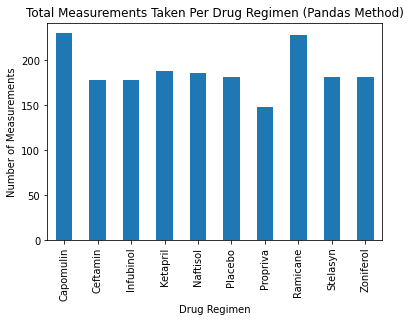

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Sort the dataset by drug regimen and count by mouse ID to calculate how many measurements were taken 
count_of_measurements = cleaned_merged_study.groupby(["Drug Regimen"]).count()["Mouse ID"]

#Create the bar plot using pandas
count_of_measurements.plot(kind="bar")

# Set a title and label axis for the bar chart
plt.title("Total Measurements Taken Per Drug Regimen (Pandas Method)")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()

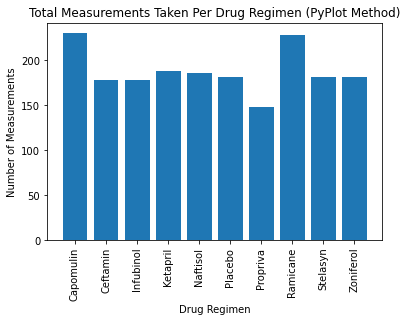

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Set x-axis to the number of drugs being measured
x_axis = np.arange(len(count_of_measurements))
tick_locations = [value for value in x_axis]

#Set y-axis to the number of measurements for each drug (calculated previously by count of measurements)
y_axis = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

#Create the bar plot using pyplot and set tick locations
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

#Name the axis and label the bar pot
plt.title("Total Measurements Taken Per Drug Regimen (PyPlot Method)")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()


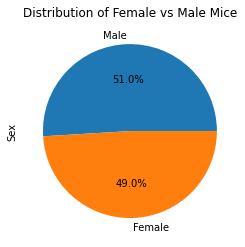

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Retrieve the "sex" column and count the number of mice per gender
count_of_sex = cleaned_merged_study["Sex"].value_counts()

#Create the pie plot and label the axis
count_of_sex.plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.show()

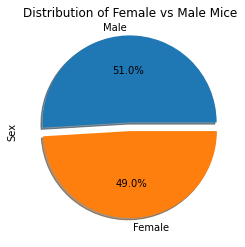

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Set the labels and variables for the chart
labels = count_of_sex.index
sizes = count_of_sex.values
explode = [0.1, 0]

#Create the pie chart
plt.pie(sizes, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
